In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data\\synthetic_ecommerce_churn_dataset.csv')

In [3]:
data.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


In [4]:
data.shape

(5000, 13)

In [5]:
data.columns

Index(['customer_id', 'age', 'gender', 'country', 'avg_order_value',
       'total_orders', 'last_purchase', 'is_fraudulent', 'preferred_category',
       'email_open_rate', 'customer_since', 'loyalty_score', 'churn_risk'],
      dtype='object')

In [6]:
data.isna().any()

customer_id           False
age                   False
gender                False
country               False
avg_order_value        True
total_orders          False
last_purchase         False
is_fraudulent         False
preferred_category    False
email_open_rate        True
customer_since        False
loyalty_score         False
churn_risk            False
dtype: bool

In [7]:
data.isnull().sum()


customer_id             0
age                     0
gender                  0
country                 0
avg_order_value       250
total_orders            0
last_purchase           0
is_fraudulent           0
preferred_category      0
email_open_rate       250
customer_since          0
loyalty_score           0
churn_risk              0
dtype: int64

avg_order_value & email_open_rate have only 5% missing values, so missing values can be imputed

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [9]:
# numeric columns
num_cols = ["age", "avg_order_value", "total_orders", "last_purchase","is_fraudulent", "email_open_rate", "loyalty_score", "churn_risk"]

num_df = data[num_cols]


In [10]:
# Fit the imputer on the data and transform it
num_df_imputed  = pd.DataFrame(
    imputer.fit_transform(num_df),
    columns=num_cols,
    index=data.index
)

num_df_imputed

,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk
0,30.0,101.08,8.0,176.0,1.0,25.600000,50.0,0.20
1,53.0,90.39,10.0,88.0,0.0,12.300000,37.0,0.34
2,73.0,83.28,6.0,203.0,0.0,50.714842,65.0,0.05
3,30.0,109.90,9.0,346.0,1.0,42.900000,93.0,0.19
4,29.0,269.38,16.0,342.0,0.0,5.300000,79.0,0.15
...,...,...,...,...,...,...,...,...
4995,49.0,132.16,9.0,306.0,0.0,20.900000,13.0,0.33
4996,23.0,47.81,10.0,296.0,0.0,50.714842,66.0,0.22
4997,79.0,224.97,16.0,84.0,0.0,92.900000,56.0,0.23
4998,62.0,220.33,8.0,254.0,0.0,83.800000,47.0,0.09


In [72]:
# Combine imputed numeric columns and non-numeric ones
non_num = data.drop(columns=num_cols)

df_clean = pd.concat([non_num, num_df_imputed], axis=1)


In [73]:
df_clean.head()

,customer_id,gender,country,preferred_category,customer_since,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk
0,CUST_8270,Female,Brazil,Beauty,2024-06-05,30.0,101.08,8.0,176.0,1.0,25.600000,50.0,0.20
1,CUST_1860,Female,USA,Electronics,2024-02-19,53.0,90.39,10.0,88.0,0.0,12.300000,37.0,0.34
2,CUST_6390,Male,Australia,Sports,2024-04-16,73.0,83.28,6.0,203.0,0.0,50.714842,65.0,0.05
3,CUST_6191,Other,Japan,Electronics,2020-07-08,30.0,109.90,9.0,346.0,1.0,42.900000,93.0,0.19
4,CUST_6734,Female,Canada,Fashion,2025-04-09,29.0,269.38,16.0,342.0,0.0,5.300000,79.0,0.15


In [74]:
df_clean.isna().any()

customer_id           False
gender                False
country               False
preferred_category    False
customer_since        False
age                   False
avg_order_value       False
total_orders          False
last_purchase         False
is_fraudulent         False
email_open_rate       False
loyalty_score         False
churn_risk            False
dtype: bool

In [75]:

df_clean.drop(columns=['customer_id'], inplace=True)


In [76]:
df_clean['customer_since'] = pd.to_datetime(df_clean['customer_since'], format='ISO8601', errors='coerce')


In [78]:
from datetime import datetime

df_clean['tenure_days'] = (datetime.now() - df_clean['customer_since']).dt.days
df_clean.drop(columns=['customer_since'], inplace=True)


In [79]:
df_clean.head()


,gender,country,preferred_category,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk,tenure_days
0,Female,Brazil,Beauty,30.0,101.08,8.0,176.0,1.0,25.600000,50.0,0.20,418
1,Female,USA,Electronics,53.0,90.39,10.0,88.0,0.0,12.300000,37.0,0.34,525
2,Male,Australia,Sports,73.0,83.28,6.0,203.0,0.0,50.714842,65.0,0.05,468
3,Other,Japan,Electronics,30.0,109.90,9.0,346.0,1.0,42.900000,93.0,0.19,1846
4,Female,Canada,Fashion,29.0,269.38,16.0,342.0,0.0,5.300000,79.0,0.15,110


In [81]:
df_clean.groupby('country')['churn_risk'].mean().sort_values(ascending=False)


country
India        0.292329
Germany      0.290550
France       0.289740
Australia    0.289286
UK           0.287464
Brazil       0.287044
Canada       0.285796
USA          0.282805
Japan        0.272409
China        0.266258
Name: churn_risk, dtype: float64

In [83]:
df_clean = pd.get_dummies(df_clean, columns=['gender', 'country', 'preferred_category'], drop_first=True)


In [84]:
df_clean.head()

,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk,tenure_days,gender_Male,...,country_France,country_Germany,country_India,country_Japan,country_UK,country_USA,preferred_category_Electronics,preferred_category_Fashion,preferred_category_Home,preferred_category_Sports
0,30.0,101.08,8.0,176.0,1.0,25.600000,50.0,0.20,418,False,...,False,False,False,False,False,False,False,False,False,False
1,53.0,90.39,10.0,88.0,0.0,12.300000,37.0,0.34,525,False,...,False,False,False,False,False,True,True,False,False,False
2,73.0,83.28,6.0,203.0,0.0,50.714842,65.0,0.05,468,True,...,False,False,False,False,False,False,False,False,False,True
3,30.0,109.90,9.0,346.0,1.0,42.900000,93.0,0.19,1846,False,...,False,False,False,True,False,False,True,False,False,False
4,29.0,269.38,16.0,342.0,0.0,5.300000,79.0,0.15,110,False,...,False,False,False,False,False,False,False,True,False,False


In [88]:
numerical_cols = ["age", "avg_order_value", "total_orders", "last_purchase","is_fraudulent", "email_open_rate", "loyalty_score"]

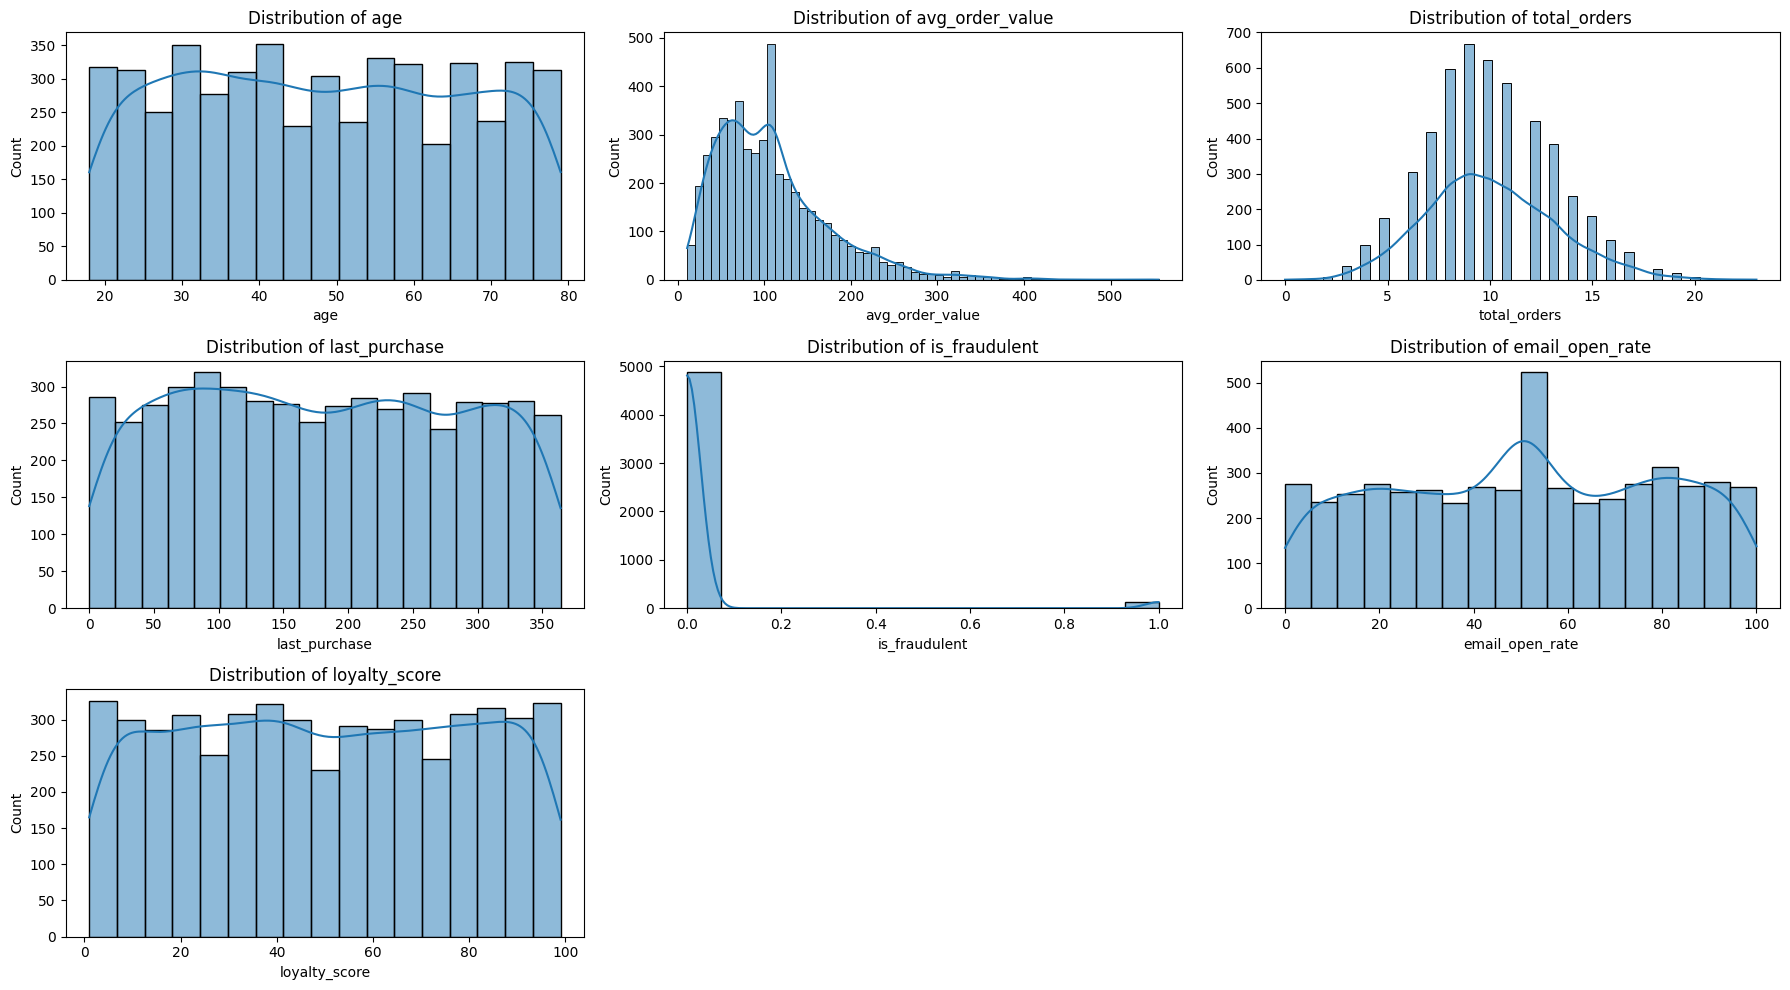

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# for col in numerical_cols:
#     plt.figure(figsize=(6,4))
#     sns.histplot(df_clean[col],kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

plt.figure(figsize=(18,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df_clean[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()